# Final project Data Visualisation and Data Science

__Welcome to the final project of Data Visualisation and Data Science!__ 

Sometimes the biggest step in learning is going from the ordered tutorial environment into the wild. It can be confusing and frustrating, so it's best to give it a try now, while you can get help.

In this project, you will try your own project, with help from the instructors.


We suggest taking a new well log (shown below), then trying some techniques from the previous noteooks. For example 
- copy UMAP from the unsupervised notebook, run it on a new well
- your own idea

Don't forget to ask for help, brainstorming, suggestions, etc

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
from ipywidgets import interact, widgets
import torchvision
import matplotlib.pyplot as plt

# Magic Function
%matplotlib inline
# Hide all warnings
import warnings
warnings.filterwarnings('ignore') # warnings.filterwarnings(action='once')

<details>
<summary><b>→ About the Geolink dataset </b></summary>

This is a well dataset of Well's Petroleum wells drilled on the Norwegian continental shelf. It was released by the Norweigen Government, cleaned by Geolink, and loaded by LukasMosser. The full dataset has 221 wells, over 150 lithologies, with around 500 MB of data.


You don't need to understand the data fully for this course, but here's a brief overview

- Well - The well name
- DEPT - Depth below the ground in meters
- LITHOLOGY_GEOLINK - This is the facies or lithology, which means rock type. This is a label, made by multiple human experts by looking at the context, the well, maps of the area, and often picture of rock samples extracted from the well.
- [Well logs](https://en.wikipedia.org/wiki/Well_logging): These are specialised measurements by instruments lowered down the well hole
    - CALI - [Caliper log](https://en.wikipedia.org/wiki/Caliper_log), this measures the size of the well bore
    - GR - [Gamma Ray](https://en.wikipedia.org/wiki/Gamma_ray_logging): Measure passive amount of high energy electromagnetic radiation naturally emitted from the rock
    - RHOB - [Bulk Density](https://en.wikipedia.org/wiki/Density_logging): Measured active amount high energy electromagnetic radiation. This has a transmitting source of gamma rays
    - DTC - [Compressional wave](https://en.wikipedia.org/wiki/Longitudinal_wave) travel time: This measure the how long a compressional wave takes to travel through the formationation
    - RDEP - [Resistivity](https://en.wikipedia.org/wiki/Resistivity_logging) Deep: Electrical resistivity through the rock with a deep penetration
    - RMED - Resistivity Medium: Electrical resistivity through the rock with a nedium penetration
    - *Many other well logs were removed as they were not present in all wells*
    
Interpreting lithology from well logs is a very hard problem for machine learning because:

- It's usually done by expert humans (Petrophysicists) with years to decades of experience, not an random human
- it takes into account context in the form of prior knowledge, geology, nearby wells, rock samples, and many more. Many of these are forms of information the machine doesn't have access to
- The data is unbalanced with important rocks like sandstone sometimes appearing as very this layers


<table>
    <tr>
        <td>
<img width="480" src="../../reports/figures/30-4_1.png"/>
        </td>
        <td>
<img width="320" src="../../data/processed/geolink_norge_dataset/location of geolink wells.png"/>
        </td>
    </tr>
</table>


### Data Disclaimer

All the data serving as an input to these notebooks was generously donated by GEOLINK  
and is CC-by-SA 4.0 

If you use this data please reference the dataset properly to give them credit for their contribution.

**Note:** download data from https://drive.google.com/drive/folders/1EgDN57LDuvlZAwr5-eHWB5CTJ7K9HpDP

Credit to this repo: https://github.com/LukasMosser/geolink_dataset

### Data Preparation

The geolink dataset we will use in this notebook has been preprocessed. You can find the process of preparation of this dataset in [Data Preparation](../z00_Data_prep/00-mc-prep_geolink_norge_dataset.ipynb)

</details>

# Load Dataset

In [60]:
interim_locations = Path("../../data/processed/geolink_norge_dataset/")
# Load processed dataset
geolink_all = pd.read_parquet(
    interim_locations / "geolink_norge_well_logs_train.parquet"
).set_index(["Well", "DEPT"])
# Add Depth as column
geolink_all['DEPT'] = geolink_all.index.get_level_values(1)

print('Choose a random well')
Wells = geolink_all.index.get_level_values(0).value_counts()
print(Wells.head(50).sample(10))

Choose a random well
35_3-2     12849
30_4-1     22921
31_3-1     11903
25_2-7     12499
30_3-3     10046
17_11-1    10773
35_4-1     23224
35_3-1     23392
15_9-12     9973
16_7-3      9040
Name: Well, dtype: int64


<div class="alert alert-info" style="font-size:100%">
Adopt a well by choosing a well name, and setting it below
</div>

In [61]:
# Choose a well name here
well_name = Wells.head(50).sample(1).index[0]
# well_name = '35_X-X'

print('well_name', well_name)
geolink = geolink_all.xs(well_name)

well_name 25_3-1


(<Figure size 576x864 with 6 Axes>,
 array([<AxesSubplot:xlabel='GR'>, <AxesSubplot:xlabel='CALI'>,
        <AxesSubplot:xlabel='RDEP (r) & RMED (g)'>,
        <AxesSubplot:xlabel='RHOB'>, <AxesSubplot:xlabel='Facies'>],
       dtype=object))

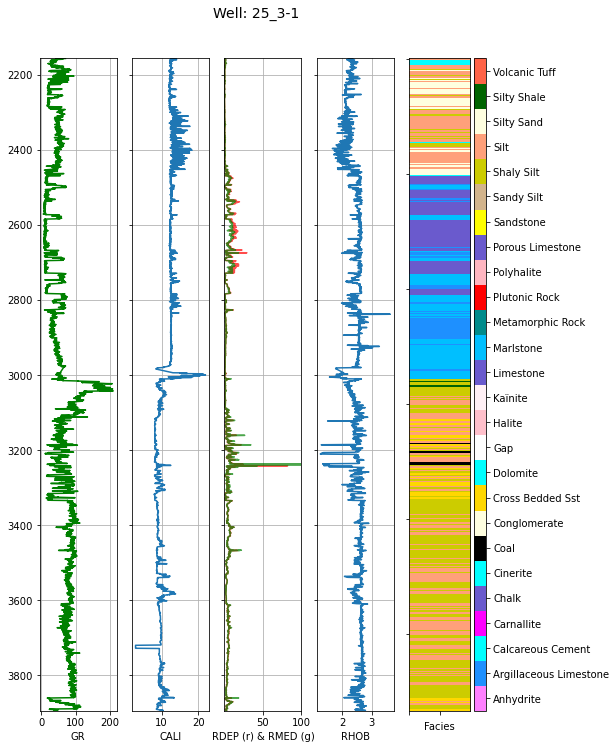

In [62]:
# View your well
from deep_ml_curriculum.visualization.well_log import plot_facies, plot_well
plot_well(well_name, geolink, facies=geolink['LITHOLOGY_GEOLINK'].astype('category').values)

In [65]:
from sklearn.preprocessing import StandardScaler

# Scale the data
sample_dataset = geolink.sample(n=5000, replace=False, random_state=2020)
# Separating features
X = sample_dataset[list(sample_dataset.columns[1:])]
# Separating target
y = sample_dataset[["LITHOLOGY_GEOLINK"]]

# Standardizing the features
X = StandardScaler().fit_transform(X)

# Project

Here you decide what you want to do. If your not sure, browse the previous notebooks, and ask the instructors.

The purpose is to try things yourself with more help and less guidance.